In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing course datasets as DataFrames

brfss = pd.read_hdf('brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG) 

brfss.head() # Display the first five rows

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [2]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


Validate a variable
In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

value	label
1	Live birth
2	Induced abortion
3	Stillbirth
4	Miscarriage
5	Ectopic pregnancy
6	Current pregnancy

Definitions:

Induced abortion: is the termination of a pregnancy by artificial means.
Stillbirth (mortinato): the birth of an infant that has died in the womb (strictly, after having survived through at least the first 28 weeks of pregnancy, earlier instances being regarded as abortion or miscarriage).
Miscarriage (aborto espontáneo): is the spontaneous loss of a pregnancy before the 20th week.
Ectopic pregnacy (embarazo ectópico): A condition where fertilized egg attaches outside the uterus. If untreated, it may lead to life-threatening bleeding.

In [3]:
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [4]:
# Clean a variable

# The variable 'nrbnaliv' records the number of babies born alive at the end of a pregnacy.
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [5]:
# Let's clean the number 8 because it is out of place

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Compute a variable

'agecon' encodes the respondent's age at conception,
'agepreg' the respondent's age at the end of the pregnacy.

In [6]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


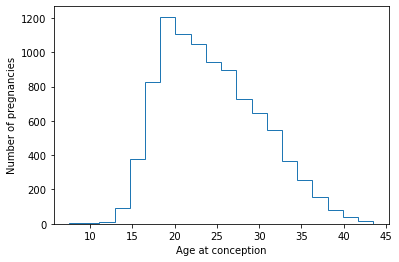

In [7]:
# Make a histogram

# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

Compute birth weight

In [8]:
## Filter full-term babies
#full_term = nsfg['prglngth'] >= 37
#
## Filter single births
#single = nsfg['nbrnaliv'] == 1
#
## Compute birth weight for single full-term babies
#single_full_term_weight = birth_weight[full_term & single]
#print('Single full-term mean:', single_full_term_weight.mean())
#
## Compute birth weight for multiple full-term babies
#mult_full_term_weight = birth_weight[full_term & ~single]
#print('Multiple full-term mean:', mult_full_term_weight.mean())


Distributions

Probability Mass Function

In [9]:
## Compute the PMF for year
#pmf_year = Pmf(gss['year'])
#
## Print the result
#print(pmf_year)

In [10]:
# Distributioon of income
# The distribution of gss is close to lognormal, so logarithms of the incomes fit a normal distribution.
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


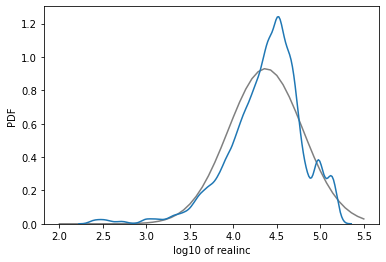

In [11]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

Relationships

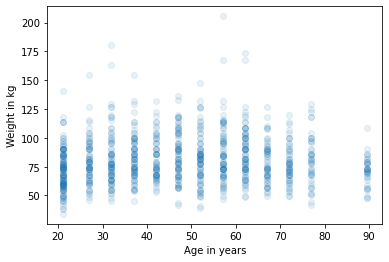

In [12]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

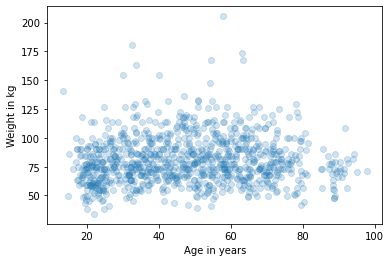

In [13]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

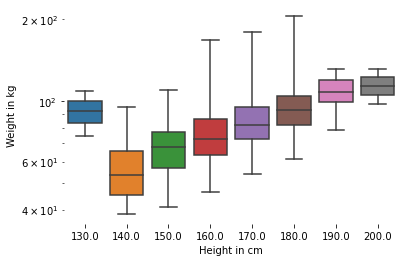

In [14]:
# Height and Weight

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(y='WTKG3', x='_HTMG10', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


In [15]:
# Computing Correlations

# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


NameError: name 'res' is not defined

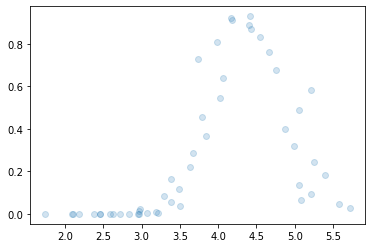

In [16]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

Multivariate Thinking

In [ ]:
#Limits of simple regression

In [18]:
# Run regression with linregress
from scipy.stats import linregress

subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


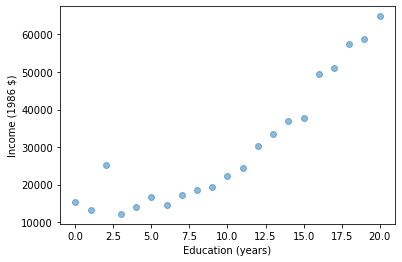

In [19]:
#Plot income and education

# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [21]:
#Non lineal model of education
# Add a new column with educ squared
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [22]:
#Visualizing regression results

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


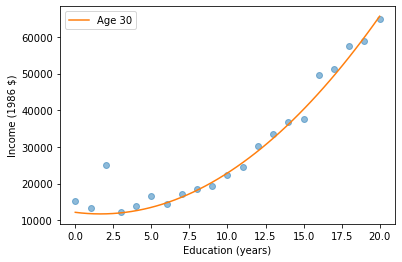

In [23]:
# Visualizing predictions

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


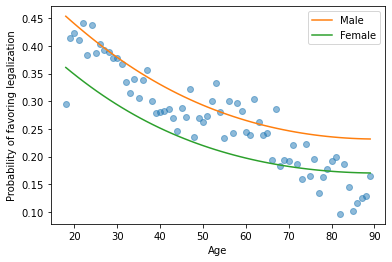

In [24]:
# Logistic Regression

# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label="Female")

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

